In [32]:
# Dependencies :
import numpy as np 
import matplotlib.pyplot as plt 
import PIL
%config InlineBackend.figure_format='svg'

In [33]:
# Loading the image to be processed :
original_image = np.asarray(PIL.Image.open("Most-Colourful-Natural-Places-In-Asia-780x450.jpg"))    
print(original_image[0])
print(f'Shape = {np.shape(original_image)}')

[[153  89 139]
 [ 61  28  49]
 [ 76  72  63]
 ...
 [127  83  84]
 [114  75  80]
 [110  57  77]]
Shape = (450, 780, 3)


In [34]:
# Normalising the RGB values from (0, 255) --> (0., 1.)
normalised_image = original_image / 255
print(normalised_image)

[[[0.6        0.34901961 0.54509804]
  [0.23921569 0.10980392 0.19215686]
  [0.29803922 0.28235294 0.24705882]
  ...
  [0.49803922 0.3254902  0.32941176]
  [0.44705882 0.29411765 0.31372549]
  [0.43137255 0.22352941 0.30196078]]

 [[0.60784314 0.40392157 0.55686275]
  [0.24313725 0.12156863 0.18431373]
  [0.08627451 0.05882353 0.02745098]
  ...
  [0.84705882 0.61176471 0.60784314]
  [0.5254902  0.31372549 0.30588235]
  [0.25490196 0.05490196 0.05098039]]

 [[0.36470588 0.2        0.29411765]
  [0.28235294 0.15686275 0.2       ]
  [0.35294118 0.28627451 0.25882353]
  ...
  [0.79215686 0.41960784 0.49803922]
  [0.54901961 0.22352941 0.2627451 ]
  [0.4        0.14117647 0.14901961]]

 ...

 [[0.42745098 0.58823529 0.32156863]
  [0.47058824 0.65098039 0.26666667]
  [0.54117647 0.7372549  0.25490196]
  ...
  [0.40392157 0.34901961 0.29803922]
  [0.4745098  0.41960784 0.37647059]
  [0.49803922 0.44313725 0.39215686]]

 [[0.43137255 0.62352941 0.17254902]
  [0.44313725 0.63921569 0.15686275]


Text(0.5, 1.0, 'Original Image')

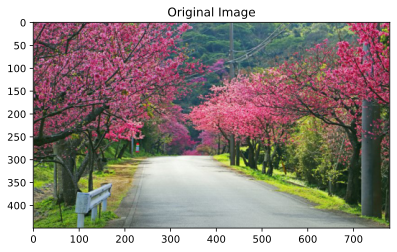

In [35]:
plt.imshow(normalised_image)
plt.title('Original Image')

In [36]:
# Reshaping the image :
norm_image = normalised_image.reshape(-1, 3)
print(norm_image)

def im_kMeans(normalised_image, n_cluster) :
    """
    Performing K-means 
    """
    n_pixels = n_pixels = len(normalised_image)
    # Initialising the cluster centers as a subset of the data :
    c_centers = np.array([normalised_image[np.random.randint(0, n_pixels)] for _ in range(n_cluster)])
    clusters = np.zeros(n_pixels)

    # Limiting the number of iterations :
    max_iterations = 100
    for _ in range(max_iterations) :
        # E step --> Assigning the centers :
        clusters = np.argmin(np.sqrt(((normalised_image - c_centers[:, np.newaxis])**2).sum(axis=2)), axis=0)
        # M step --> Updating the centers :
        new_centers = np.zeros((n_cluster, normalised_image.shape[1]))
        for i in range(n_cluster):
            new_centers[i] = np.mean(normalised_image[clusters == i], axis=0)
        # Check for convergence :
        if np.all(c_centers == new_centers) :
            break
        # Reassignment if unconverged
        c_centers = new_centers

    return c_centers[clusters].reshape(original_image.shape)

[[0.6        0.34901961 0.54509804]
 [0.23921569 0.10980392 0.19215686]
 [0.29803922 0.28235294 0.24705882]
 ...
 [0.42352941 0.4        0.30588235]
 [0.41176471 0.38823529 0.29411765]
 [0.39215686 0.36078431 0.27058824]]


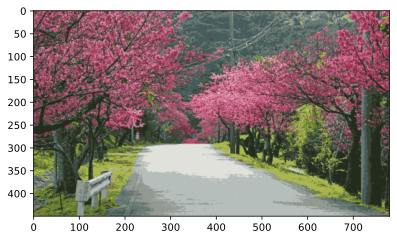

In [45]:
k = 15
segmented_image = im_kMeans(norm_image, k)
plt.imshow(segmented_image)
plt.savefig(f'n_cluster_{k}')